# Image similarity search with clustering

In [2]:
from image_classification_simulation.data.office31_loader import (
    Office31Loader
)
from image_classification_simulation.models.clustering import (
    show_grid_images
)
from image_classification_simulation.image_search import (
    ImageSimilaritySearch
)


In [3]:
hparams = {
    "num_workers": 2,
    'batch_size': 32,
    "image_size":224,
    "train_test_split":0.1,
}
office_loader = Office31Loader(data_dir="../examples/data/domain_adaptation_images/amazon/images/", hyper_params=hparams)
office_loader.setup('fit')
train_loader = office_loader.train_dataloader()
val_loader = office_loader.val_dataloader()
test_loader = office_loader.test_dataloader()

hparams = {
        "clustering_alg": "MiniBatchKMeans",
        "loss": "CrossEntropyLoss",
        "batch_size": 124,
        "pretrained": True,
        "num_classes": 31,
        "path_features_ext": "../examples/resnet/output/best_model/model.ckpt",
        "architecture": "resnet",
        "num_clusters": 31,
        "random_state": 0,
        "clustering_batch_size": 124,
        "size":256,
        "reassignment_ratio": 0.05,
        "path_to_model": "../debug/clustering_model.joblib",
        "path_cluster_ids": "../debug/dataset_cluster_ids.csv",
    }
image_search = ImageSimilaritySearch(hparams, office_loader)
image_search.setup()

>>> loaded cluster ids from file
>>> Found cluster ids from file
[MiniBatchKMeans] Reassigning 10 cluster centers.
[MiniBatchKMeans] Reassigning 11 cluster centers.
[MiniBatchKMeans] Reassigning 3 cluster centers.
[MiniBatchKMeans] Reassigning 5 cluster centers.
[MiniBatchKMeans] Reassigning 5 cluster centers.
[MiniBatchKMeans] Reassigning 9 cluster centers.
>>> saved cluster ids to file
>>> setup completed successfully!


you may need to run this file as a python script to have results printed to file.

In [4]:
import matplotlib.pyplot as plt
def show_grid_images(
        images: list,
        # labels=query_result["labels"],
        num_rows=5,
        num_cols=5,
        save_path=None,):
    """this function shows a list of images in a grid"""
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(num_cols):
            img = plt.imread( images[i * num_cols + j]) 
            ax[i, j].imshow(img)
            # ax[i, j].set_title(labels[i * num_cols + j])
            ax[i, j].axis("off")
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()
    if save_path is not None:
        plt.savefig(save_path)
    return fig, ax


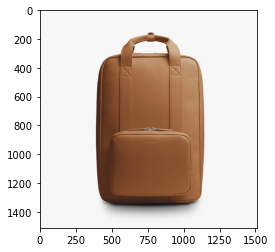

In [32]:
plt.imshow(plt.imread("./test_cases/backpack1.jpeg"))

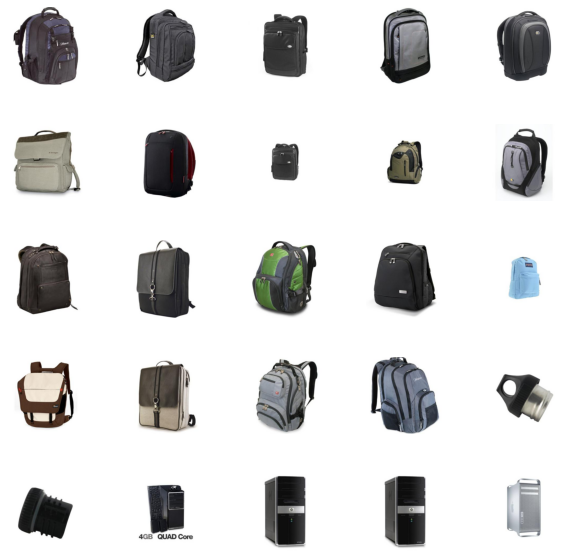

(<Figure size 720x720 with 25 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [6]:
query_res = image_search.find_similar_images("./test_cases/backpack1.jpeg")
show_grid_images(query_res['image_path'].tolist())

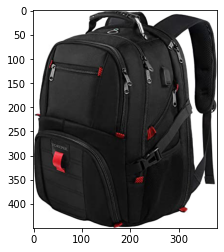

In [7]:
plt.imshow(plt.imread("./test_cases/backpack2.jpeg"))

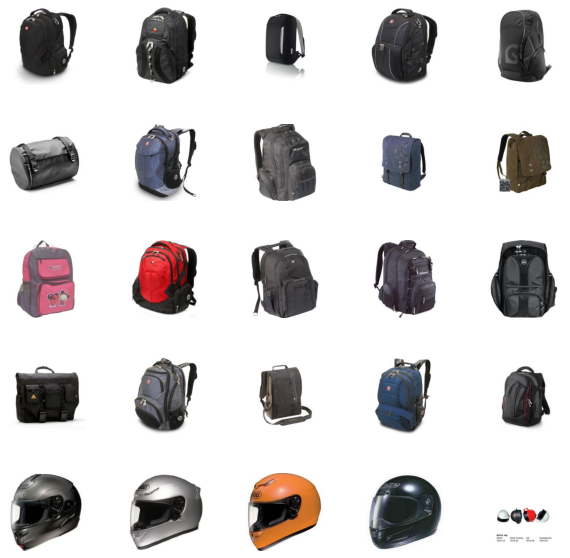

(<Figure size 720x720 with 25 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [8]:
query_res = image_search.find_similar_images("./test_cases/backpack2.jpeg")
show_grid_images(query_res['image_path'].tolist())


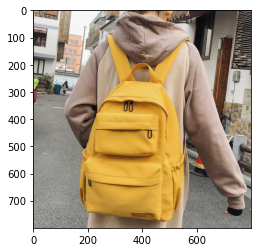

In [8]:
plt.imshow(plt.imread("./test_cases/backpack3.jpeg"))

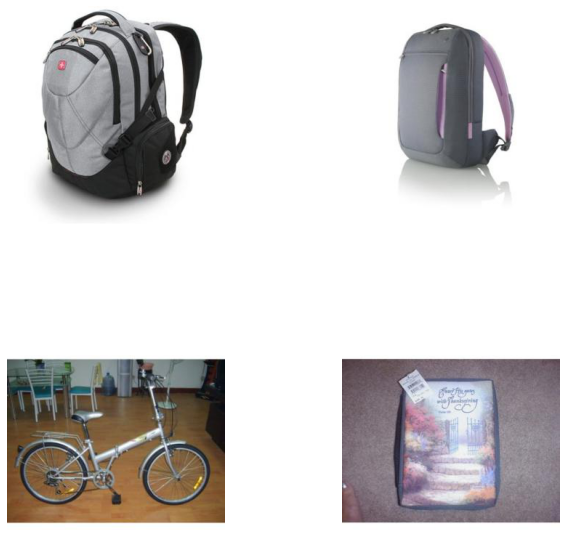

(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

In [9]:
query_res = image_search.find_similar_images("./test_cases/backpack3.jpeg")
show_grid_images(query_res['image_path'].tolist(),num_rows=2,num_cols=2)
